In [110]:
import pandas as pd
import numpy as np
from vega_datasets import data
import matplotlib.pyplot as plt 
import seaborn as sns

In [74]:
# import data
temp_df = data.sf_temps()
temp_df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [75]:
# index first
temp_df = temp_df.set_index('date')

In [76]:
temp_df = temp_df.sort_index()

In [77]:
temp_df.index.min()

Timestamp('2010-01-01 00:00:00')

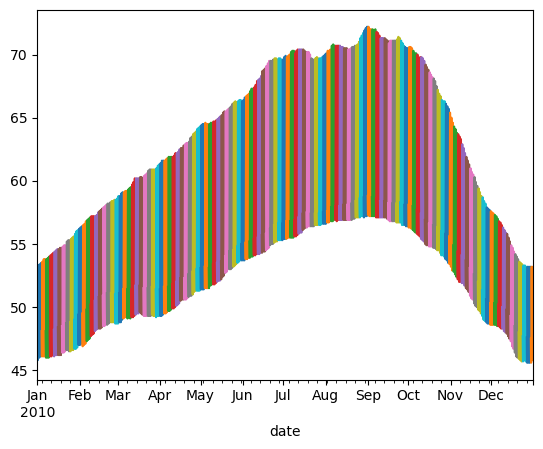

In [52]:
temp3d = temp.resample('3d').plot()

# Resample by the day and take the average temperature. Visualize the average temperature over time.

In [78]:
temp3d = temp_df.resample('3d').mean()

Text(0, 0.5, 'Data Over 2010 ')

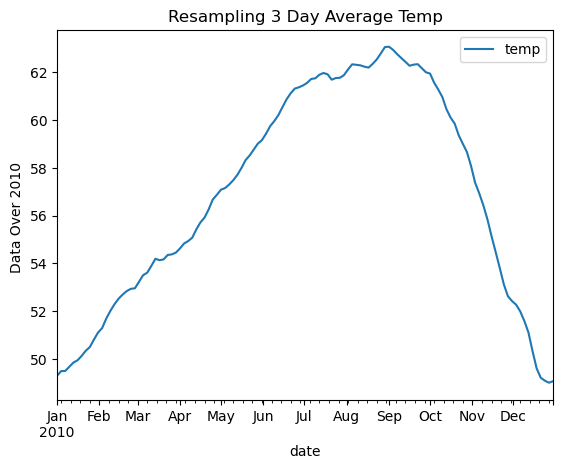

In [79]:
temp3d.plot()
plt.title('Resampling 3 Day Average Temp')
plt.ylabel('Temp Average in Celsius')
plt.ylabel('Date Over 2010 ')

# Write the code necessary to visualize the minimum temperature over time.

Text(0, 0.5, 'Data Over 2010 ')

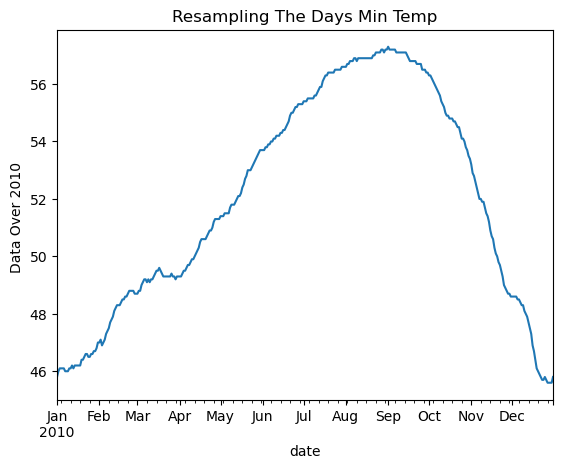

In [84]:
# when this resamples, it takes the day then the aggregation is the min over the 
temp.resample('D').temp.min().plot()
plt.title('Resampling The Days Min Temp')
plt.ylabel('Temp Count in Celsius')
plt.ylabel('Date Over 2010 ')

# Write the code necessary to visualize the maximum temperature over time.

Text(0, 0.5, 'Date Over 2010 ')

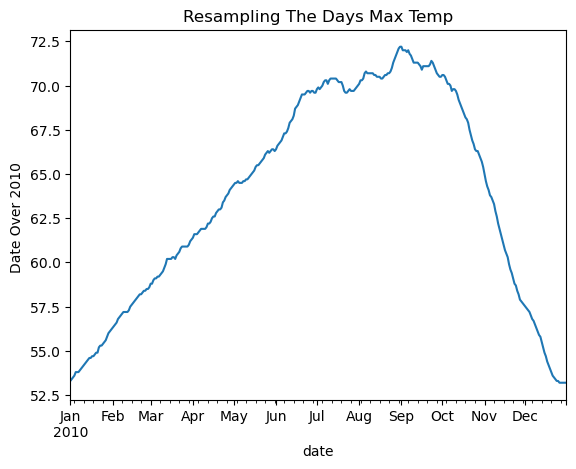

In [86]:
# when this resamples, it takes the day then the aggregation is the min over the 
temp.resample('D').temp.max().plot()
plt.title('Resampling The Days Max Temp')
plt.ylabel('Temp Count in Celsius')
plt.ylabel('Date Over 2010 ')

# Which month is the coldest, on average?

In [97]:
# a series which relfects the index as months and the value, the average temp of the month. January is the coldest
temp.groupby(by=temp.index.month).temp.mean()

date
1     49.984140
2     52.243899
3     53.956528
4     55.633056
5     57.970968
6     60.444722
7     61.765457
8     62.405376
9     62.487083
10    60.253091
11    55.185139
12    50.498253
Name: temp, dtype: float64

<AxesSubplot:xlabel='date'>

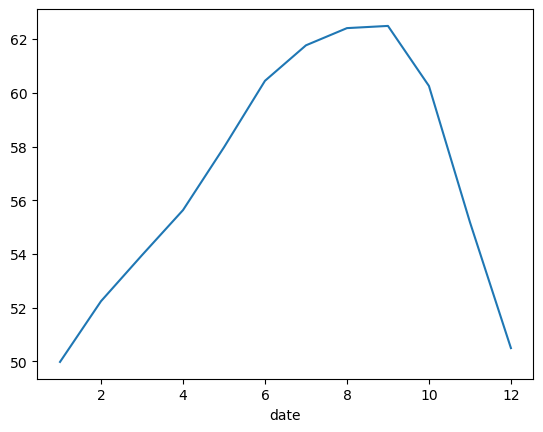

In [99]:
# same graph as below
temp.groupby(by=temp.index.month).temp.mean().plot()

Text(0, 0.5, 'Date Over 2010 ')

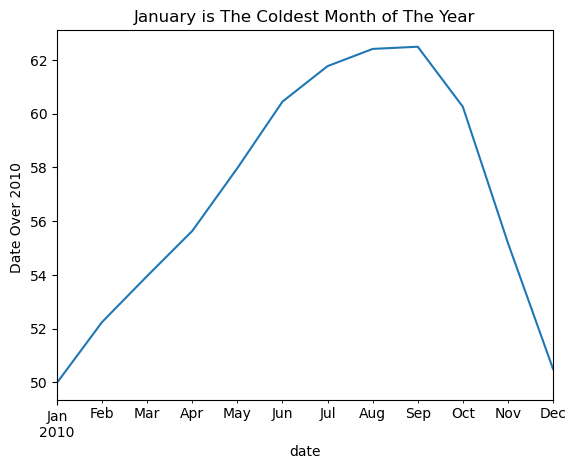

In [98]:
# when this resamples, it takes the day then the aggregation is the min over the 
temp.resample('M').temp.mean().plot()
plt.title('January is The Coldest Month of The Year')
plt.ylabel('Temp Count in Celsius')
plt.ylabel('Date Over 2010 ')


# Which month has the highest average temperature?

In [100]:
# a series which relfects the index as months and the value, the average temp of the month. Aug and Sept are the hottest
temp.groupby(by=temp.index.month).temp.max()

date
1     56.2
2     58.6
3     61.3
4     64.3
5     66.4
6     69.7
7     70.4
8     72.2
9     72.2
10    70.6
11    65.0
12    57.5
Name: temp, dtype: float64

Text(0, 0.5, 'Date Over 2010 ')

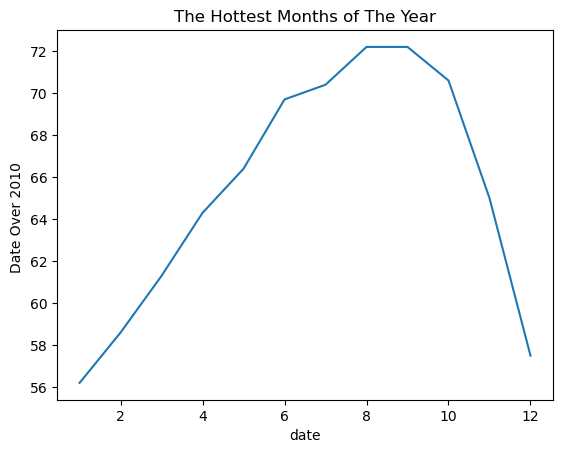

In [102]:
# when this resamples, it takes the day then the aggregation is the min over the 
temp.groupby(by=temp.index.month).temp.max().plot()
plt.title('The Hottest Months of The Year')
plt.ylabel('Temp Count in Celsius')
plt.ylabel('Date Over 2010 ')

# Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [104]:
# resample by day, agg by list of min and max
min_max_temp = temp.resample('D').temp.agg(['min','max'])

In [114]:
min_max_temp['average']= temp.resample('D').temp.mean()

In [108]:
min_max_temp['variability'] = min_max_temp['max'] - min_max_temp['min']
min_max_temp

,min,max,variability
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [ ]:
#Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

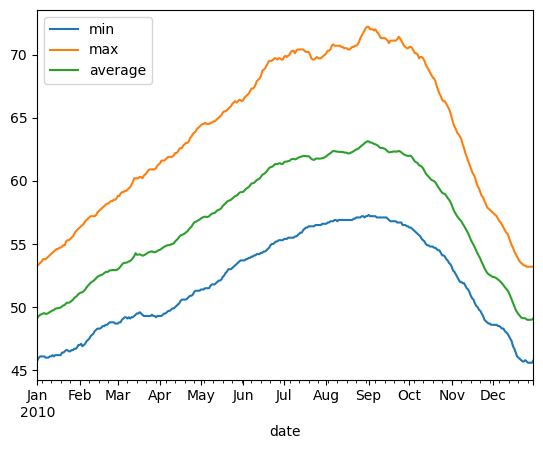

In [117]:
min_max_temp[['min','max','average']].plot()

# data.seattle_weather()

# Use the above dataset for the following exercises:


In [168]:
sw = data.seattle_weather()

In [169]:
sw

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [170]:
# set index to date
sw = sw.set_index('date').sort_index()

# Which year and month combination has the highest amount of precipitation?

In [171]:
sw.resample('M').precipitation.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [172]:
# the month of december, 2015

# Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

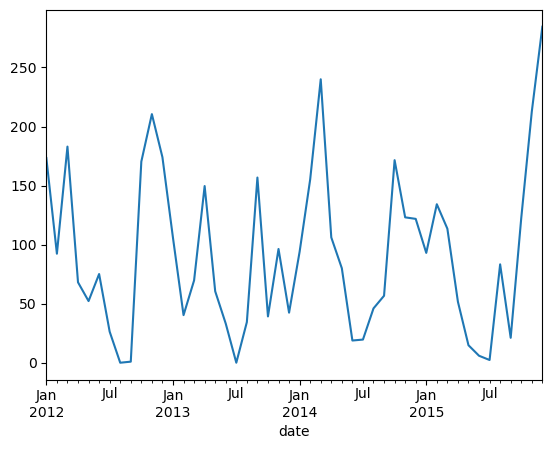

In [173]:
sw.resample('M').precipitation.sum().plot()

# Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

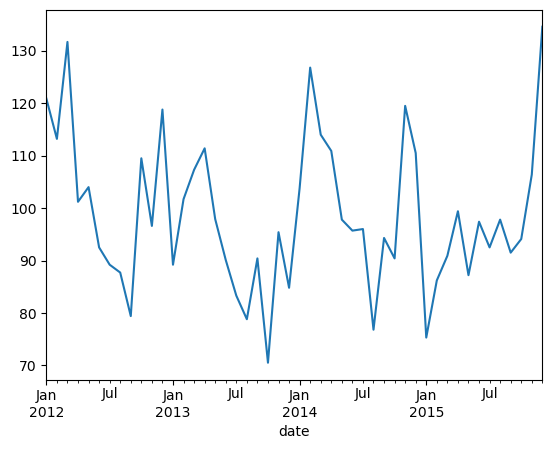

In [180]:
sw.resample("M").wind.sum().plot()

# Which year-month combination is the windiest?

In [185]:
sw.resample('M').wind.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [ ]:
 #  dec 12,2015

# What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [189]:
sw.resample('Y').weather.value_counts()

date        weather
2012-12-31  rain       191
            sun        118
            drizzle     31
            snow        21
            fog          5
2013-12-31  sun        205
            fog         82
            rain        60
            drizzle     16
            snow         2
2014-12-31  sun        211
            fog        151
            rain         3
2015-12-31  sun        180
            fog        173
            drizzle      7
            rain         5
Name: weather, dtype: int64

In [ ]:
# 2013

# In which month does it rain the most?

In [193]:
rain = pd.DataFrame(sw.resample('m').precipitation.sum())

In [197]:
rain['month'] = rain.index.strftime('%B')

In [201]:
rain.groupby('month').precipitation.mean().idxmax()

'November'

# Which month has the most number of days with a non-zero amount of precipitation?

In [205]:
# deciding if it rain, labeling no rain as zero, and yes rain as 1
sw['yes_rain']= np.where(sw['precipitation'] == 0,0,1)

In [208]:
# resample from month and summed all rain
rained = pd.DataFrame(sw.resample('m').yes_rain.sum())

In [211]:
# pulling month from date index
rained['month'] = rained.index.strftime('%B')

In [222]:
rained.groupby('month').yes_rain.sum().idxmax(),rained.groupby('month').yes_rain.sum().max()

('December', 81)

# data.flights_20k()

# Use the above dataset for the following exercises:



In [234]:
fl = data.flights_20k()

# Convert any negative delays to 0.

In [235]:
fl.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [250]:
# i keep recieving this error and it's not working anymore
'''# loop throught the length of the column
for i in range(0,len(fl.delay)):
    
    # loc [i] is less than 0 or neg, proceed
    if fl.loc[i].delay < 0:
        
        # apply zero to that value
        fl.iloc[i].delay = 0
'''

/var/folders/d0/5dr5q0n145vcn3_m9dxy1xq80000gn/T/ipykernel_2125/2014077397.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl.iloc[i].delay = 0


In [252]:
# where fl.delay column is less than or equal to zero, convert to zero and reassign the column
fl['delay'] = fl['delay'].where(fl['delay'] >= 0, 0)

In [255]:
fl.head(5)

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


# Which hour of the day has the highest average delay?

In [260]:
# set index to date
fl = fl.set_index('date').sort_index()

In [269]:
# creating an hour column
fl['hour']= fl.index.strftime('%H')

In [271]:
fl.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,00
2001-01-01 06:20:00,0,491,BNA,MCI,06
2001-01-01 06:30:00,0,251,MDW,STL,06
2001-01-01 07:00:00,0,361,OAK,ONT,07
2001-01-01 07:00:00,0,303,MSY,HOU,07


In [275]:
fl.groupby('hour').delay.mean().idxmax(),fl.groupby('hour').delay.mean().max()

('03', 302.5)

# Does the day of the week make a difference in the delay amount?

In [285]:
# creating a day of the week column
fl['dow']= fl.index.strftime('%a') 

In [286]:
fl.head(1)

,delay,distance,origin,destination,hour,dow
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,00,Mon


In [287]:
# group by day of the week look at average mean
fl.groupby('dow').delay.mean()

dow
Fri    17.757596
Mon     7.165772
Sat     8.431498
Sun    10.413542
Thu    12.821322
Tue     9.410866
Wed    11.032478
Name: delay, dtype: float64

# Does the month make a difference in the delay amount?

In [288]:
# creating a month column
fl['month']= fl.index.strftime('%m') 

In [289]:
# groub by month, checking delay average
fl.groupby('month').delay.mean()

month
01    11.301592
02    12.306106
03     9.875287
Name: delay, dtype: float64